## Non-Positional Encodings for Third Variables

There are four major cases to consider when we want to plot three variables together:

1. Three numeric variables
2. two numeric variables and one categorical variable
3. one numeric variable and two categorical variables
4. three categorical variables

A numerical variable is a variable where the value has meaning (e.g., weight or age), but a value such as a phone number doesn't have meaning in the numbers alone. A categorical variable is a variable that holds a type (e.g., species or hair color).

If we have at least two numeric variables, as in the first two cases, one common method for depicting the data is by using a scatterplot to encode two of the numeric variables, then using a non-positional encoding on the points to convey the value on the third variable, whether numeric or categorical. (You will see additional techniques later in the lesson that can also be applied to the other two cases, i.e., where we have at least two categorical variables.)

Three main non-positional encodings stand out:

- marker color
- marker shape
- marker size

For Matplotlib and Seaborn, color is the easiest of these three encodings to apply for a third variable. Color can be used to encode both qualitative and quantitative data, with different types of color palettes used for different use cases. Because of how broadly color can be used, a dedicated discussion of color and its use in Matplotlib and Seaborn will be deferred to the next page in the lesson.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# load dataset
df = pd.read_csv('../Data/fuel-econ.csv')

# create transmission type column
df['trans_type'] = df['trans'].apply(lambda x:x.split()[0])

np.random.seed(2018)
sample = np.random.choice(df.shape[0], 200, replace = False)
fuel_econ_subset = df.loc[sample]

### Encoding via Color

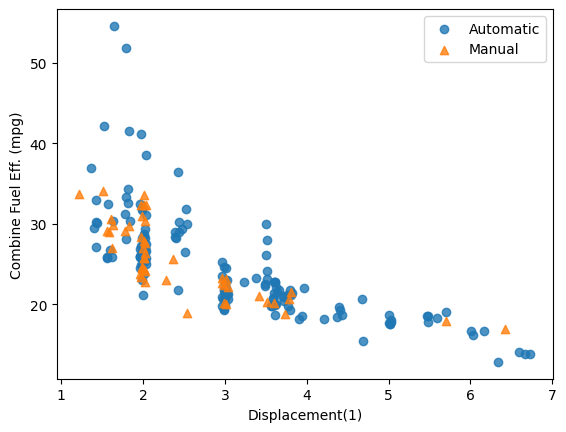

In [4]:
ttype_markers = [['Automatic', 'o'], 
                 ['Manual', '^']]

for ttype, marker in ttype_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    sns.regplot(data=plot_data, x='displ', y='comb',
                x_jitter=0.04, fit_reg=False, marker=marker);
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');
plt.legend(['Automatic', 'Manual']);

### Encoding via Size

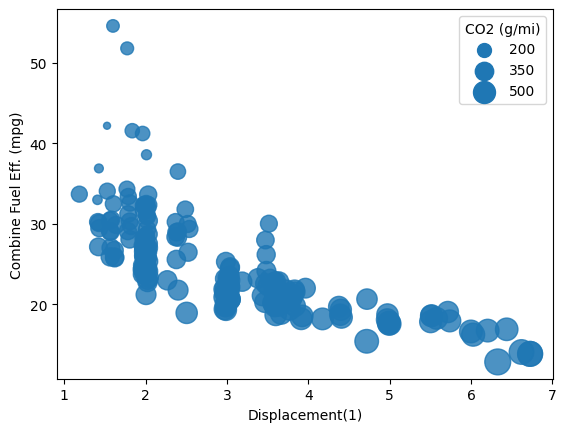

In [5]:
sns.regplot(data=fuel_econ_subset, x='displ', y='comb', 
           x_jitter=0.04, fit_reg=False, scatter_kws={'s': fuel_econ_subset['co2']/2});
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

sizes = [200, 350, 500]
legend_obj = []
for s in sizes: 
    legend_obj.append(plt.scatter([], [], s=s/2, color ='tab:blue'))
plt.legend(legend_obj, sizes, title = 'CO2 (g/mi)');

### Encoding via Shape

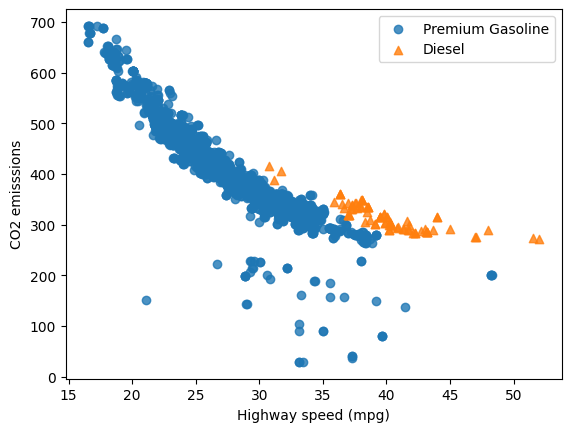

In [6]:
ttype_markers = [['Premium Gasoline', 'o'], 
                 ['Diesel', '^']]

for ttype, marker in ttype_markers:
    plot_data = df.loc[df['fuelType'] == ttype]
    sns.regplot(data=plot_data, x='highway', y='co2',
                x_jitter=0.04, fit_reg=False, marker=marker);
plt.xlabel('Highway speed (mpg)')
plt.ylabel('CO2 emisssions');
plt.legend(['Premium Gasoline', 'Diesel']);

### Encoding via Size

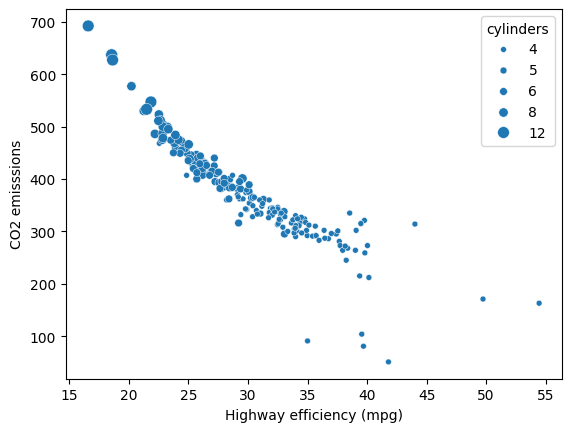

In [7]:
sns.scatterplot(data=fuel_econ_subset, x='highway', y='co2', size='cylinders', color='tab:blue')
plt.xlabel('Highway efficiency (mpg)')
plt.ylabel('CO2 emisssions');

A Warning on Combining Encodings

It might seem plausible to combine both size and shape encodings into the same plot, to depict the trend in four variables at once. This may be true but there are some cautions to be taken with this approach. One surface issue is that the code to depict the plot and a reasonable legend gets complicated. A more important issue is that point areas won't all be the same even with the same value, depending on the shape of the marker:

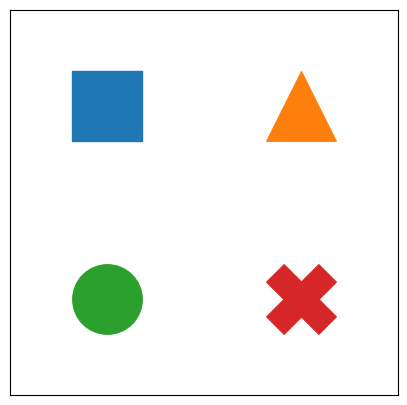

In [8]:
plt.figure(figsize = [5,5])

common_size = 2500
plt.scatter([0],[1], marker='s', s=common_size)
plt.scatter([1],[1], marker='^', s=common_size)
plt.scatter([0],[0], marker='o', s=common_size)
plt.scatter([1],[0], marker='X', s=common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5,1.5)
plt.xticks([])
plt.ylim(-0.5,1.5)
plt.yticks([]);

Despite having the same "s" values, the triangle, circle, and X markers all look smaller (have a smaller area) than the square. Perhaps this isn't a major concern, considering that size is better used as a qualitative measure for exploration. But it's still something to consider. A little more discussion of the number of variables that can be reasonably packed into a plot can be found later in the lesson ("How much is too much?").

https://matplotlib.org/stable/api/markers_api.html

## Encoding via Color

Color is a very common encoding for variables, for both qualitative and quantitative variables. You've already seen this employed in previous lessons where position could not be used to encode a value:

- color for category in a clustered bar chart
- color for count in a heat map (both as a 2-d histogram and as a 2-d bar chart)

Here, we'll look at how to employ color in scatterplots, as well as discuss more about color palette choices depending on the type of data you have.

### Color Palettes

Depending on the type of data you have, you may want to change the type of color palette that you use to depict your data. There are three major classes of color palette to consider:

- **Qualitative**: Qualitative Palette with distinct set of colors
- **Sequential**:  Sequential Palette with one color from light to dark with one end of the spectrum representing higher values while the other represents lower values
- **Diverging**: Diverging palettes that have two different colors that split off from a neutral tone typically seen in +/- distinctions.

![screen-shot-2021-05-27-at-8 12 10-am](https://github.com/user-attachments/assets/395ab00f-f232-4fe7-80b7-b50ccd33f451)

### Warnings on Color

There are a couple of things to be aware of in general, when working with color. First of all, try and consider color blindness when selecting color for your plots. You don't want your visualization to shut out the 8% of the population that have some kind of color vision deficiency. Fortunately, the built-in color palettes highlighted in the previous section should minimize these concerns. If you use a different, or custom palette, it might be worth checking your visualization's interpretability through a color blindness simulator like this one from DaltonLens.

Secondly, you want to be aware of the effect of transparency and overlap on interpretability. If points of different color on a qualitative scale overlap, the result may be a third color that cannot be matched to something in the palette. If multiple points on a quantitative scale overlap, then the result may be a value that does not actually exist in the data.

![image](https://github.com/user-attachments/assets/de5b8962-f5fb-4088-9080-2066b247e56c)

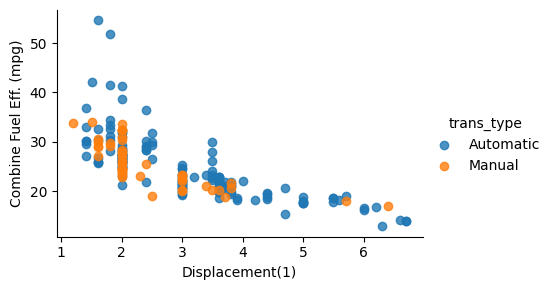

In [9]:
g = sns.FacetGrid(data=fuel_econ_subset, hue='trans_type',
                hue_order=['Automatic', 'Manual'], aspect=1.5)
g.map(sns.regplot,'displ','comb', fit_reg=False);
g.add_legend()
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

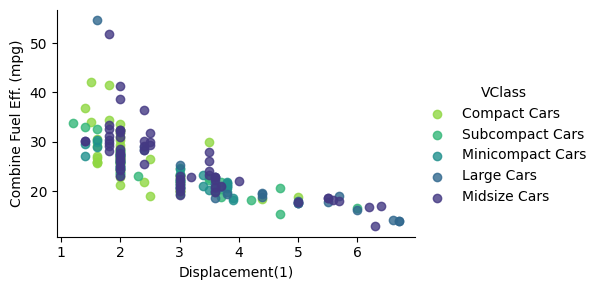

In [10]:
g = sns.FacetGrid(data=fuel_econ_subset, hue='VClass',
               aspect=1.5, palette='viridis_r')
g.map(sns.regplot,'displ','comb', fit_reg=False);
g.add_legend()
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

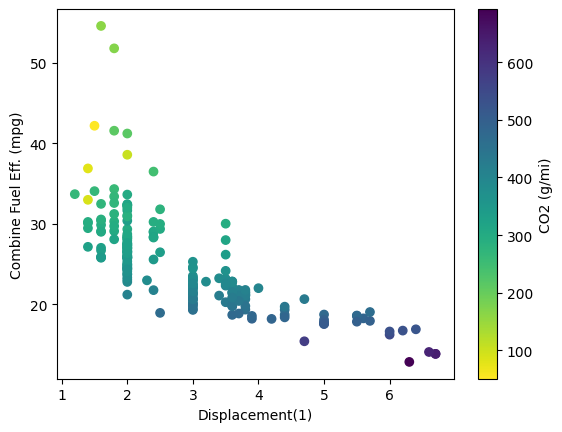

In [11]:
plt.scatter(data=fuel_econ_subset, x='displ', y='comb', c='co2',
            cmap='viridis_r')
plt.colorbar(label='CO2 (g/mi)')
plt.xlabel('Displacement(1)')
plt.ylabel('Combine Fuel Eff. (mpg)');

### Encoding via Color for a Quantitative Variable

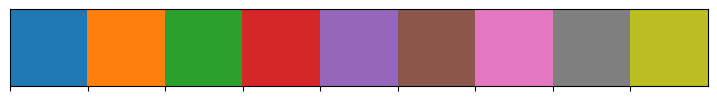

In [12]:
sns.palplot(sns.color_palette(n_colors=9))

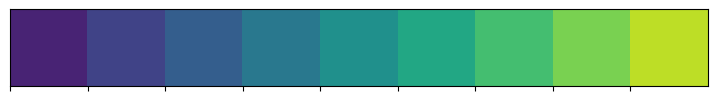

In [13]:
sns.palplot(sns.color_palette('viridis', 9))

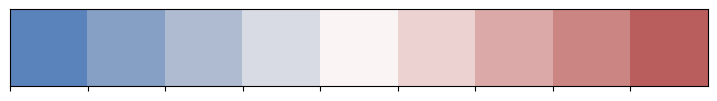

In [14]:
sns.palplot(sns.color_palette('vlag', 9))

https://daltonlens.org/colorblindness-simulator

![image](https://github.com/user-attachments/assets/d5b6ad01-6a0f-4264-ace1-1e5316501236)

https://agilescientific.com/blog/2017/12/14/no-more-rainbows

https://blog.datawrapper.de/how-to-choose-a-color-palette-for-choropleth-maps/

https://matplotlib.org/stable/users/explain/colors/colormaps.html

https://seaborn.pydata.org/tutorial/color_palettes.html

https://eagereyes.org/blog/2023/rainbow-colormaps-are-not-all-bad-paper

## Faceting in Two Directions


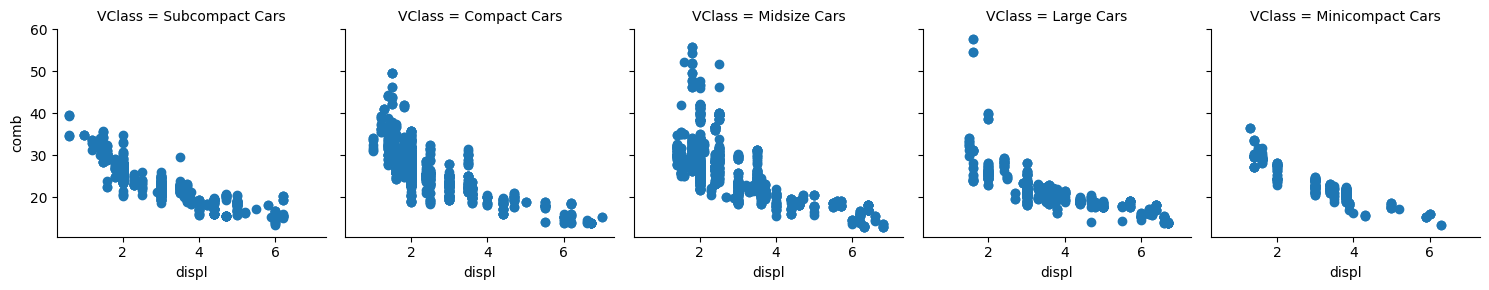

In [17]:
g = sns.FacetGrid(data=df, col='VClass')
g.map(plt.scatter, 'displ','comb');

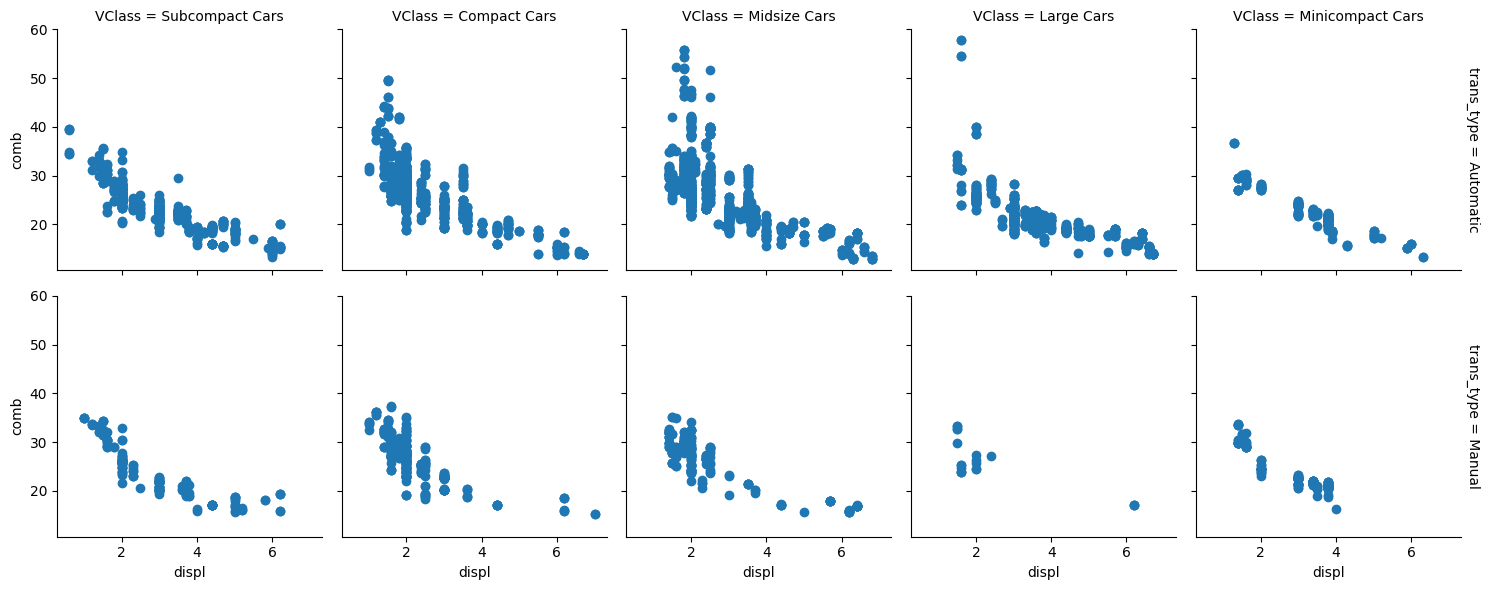

In [18]:
# Scatterplot Fuel Efficiency by Vehicle Class and Transmission Type
g = sns.FacetGrid(data=df, col='VClass', row='trans_type', margin_titles=True)
g.map(plt.scatter, 'displ','comb');

### Faceting for Multivariate Data

In the previous lesson, you saw how FacetGrid could be used to subset your dataset across levels of a categorical variable, and then create one plot for each subset. Where the faceted plots demonstrated were univariate before, you can actually use any plot type, allowing you to facet bivariate plots to create a multivariate visualization.

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\SS\AppData\Local\Temp\ipykernel_9076\3189403255.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=20);
C:\Users\SS\AppData\Local\Temp\ipykernel_9076\3189403255.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=20);


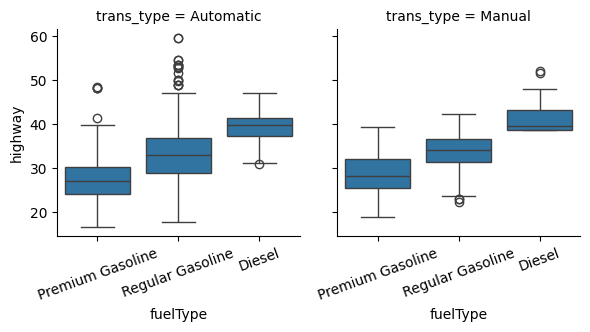

In [28]:
# select only two fuel types to make plotting easier
subset = df[df['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline', 'Diesel'])]
g = sns.FacetGrid(data=subset, col='trans_type')
g.map(sns.boxplot, 'fuelType', 'highway',)
for ax in g.axes.flat:
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=20);

The faceted box plot suggests that there is little difference between transmission types, although manual transmission tends to be slightly more efficient on average. There is clear different between gasoline grades however.

FacetGrid also allows for faceting a variable not just by columns, but also by rows. We can set one categorical variable on each of the two facet axes for one additional method of depicting multivariate trends.

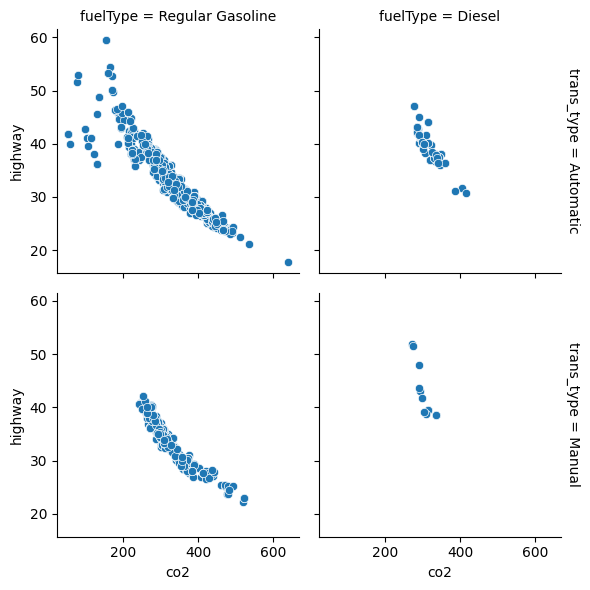

In [30]:
# simply by only looking at two fuel types
df_fueltypes = df[(df['fuelType'] == 'Regular Gasoline') | (df['fuelType'] == 'Diesel')].reset_index(drop=True)

g = sns.FacetGrid(data=df_fueltypes, col='fuelType', row='trans_type', margin_titles=True)
g.map(sns.scatterplot, 'co2', 'highway');

## Other Adaptations of Bivariate Plots

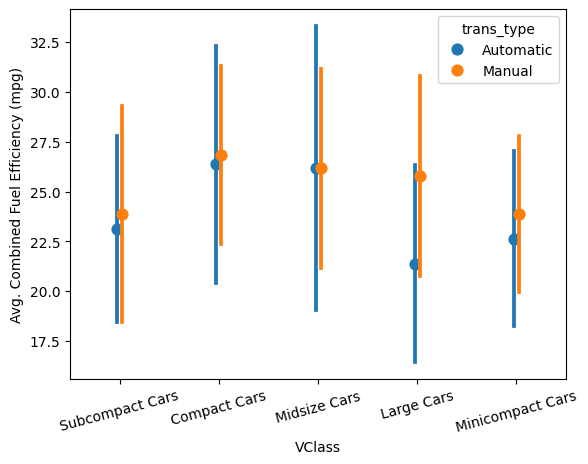

In [32]:
sns.pointplot(data=df, x='VClass', y='comb', 
             hue='trans_type', errorbar='sd',
             linestyles="", dodge=True);
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

### Clustered Bar Plot

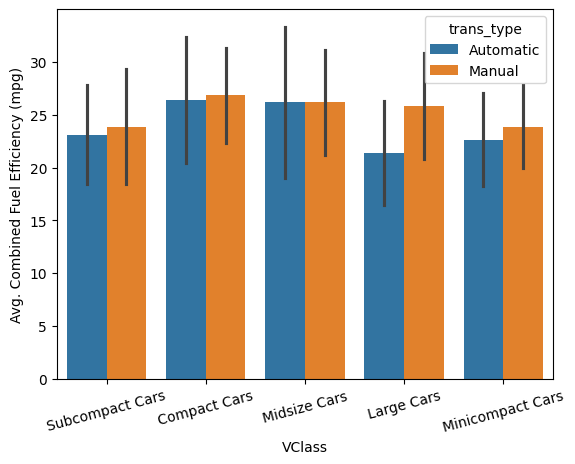

In [33]:
# Clustered Bar Plot of Fuel Efficiency by Vehicle Class and Transmission Type
sns.barplot(data=df, x='VClass', y='comb', hue='trans_type',
            errorbar='sd');
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

### Clustered Box Plot

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

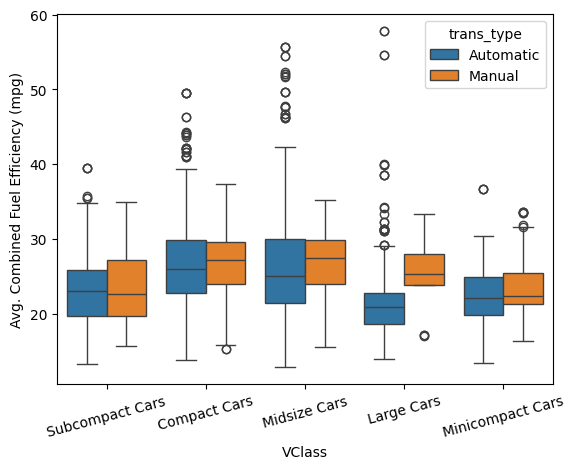

In [34]:
# Clustered Box Plot of Fuel Efficiency by Vehicle Class and Transmission Type
sns.boxplot(data=df, x='VClass', y='comb', hue='trans_type');
plt.xticks(rotation = 15)
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

### Heatmap Plot

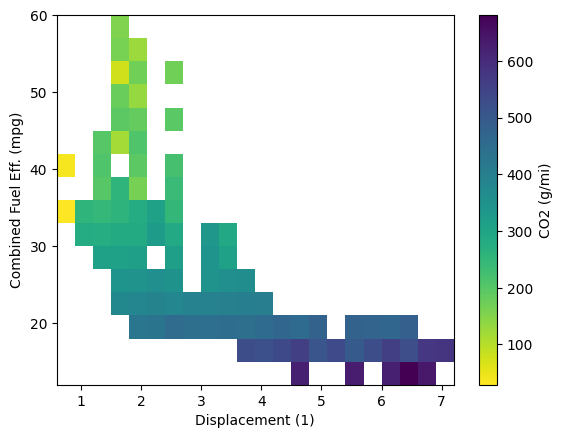

In [35]:
# Multivariate Heatmap
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

# Determine which bin for each point
displ_bins = pd.cut(df['displ'], bins_x, right=False, 
                    include_lowest=False, labels=False).astype(int)
comb_bins = pd.cut(df['comb'], bins_y, right=False, 
                    include_lowest=False, labels=False).astype(int)

# Count the points in each bin
n_points = df.groupby([displ_bins, comb_bins]).size()
n_points = n_points.reset_index().pivot(index = 'displ', columns = 'comb').values

# Divide CO2 by the number of points in each bin
co2_weights = df['co2'] / n_points[displ_bins, comb_bins]

# Plot the heatmap
plt.hist2d(data= df, x='displ', y='comb', cmin=0.5, 
          cmap='viridis_r', bins=[bins_x, bins_y], weights=co2_weights);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');
plt.colorbar(label = 'CO2 (g/mi)');

## Other Adaptations of Bivariate Plots

You also saw one other way of expanding univariate plots into bivariate plots in the previous lesson: substituting count on a bar chart or histogram for the mean, median, or some other statistic of a second variable. This adaptation can also be done for bivariate plots like the heat map, clustered bar chart, and line plot, to allow them to depict multivariate relationships.

If we want to depict the mean of a third variable in a 2-d histogram, we need to change the weights of points in the hist2d function similar to how we changed the weights in the 1-d histogram.

In [ ]:
xbin_edges = np.arange(0.25, df['num_var1'].max()+0.5, 0.5)
ybin_edges = np.arange(7,    df['num_var2'].max()+0.5, 0.5)

# count number of points in each bin
xbin_idxs = pd.cut(df['num_var1'], xbin_edges, right=False,
                    include_lowest=False, labels=False).astype(int)
ybin_idxs = pd.cut(df['num_var2'], ybin_edges, right=False,
                    include_lowest=False, labels=False).astype(int)

pts_per_bin = df.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index='num_var1', columns='num_var2').values

z_wts = df['num_var3'] / pts_per_bin[xbin_idxs, ybin_idxs]

# plot the data using the calculated weights
plt.hist2d(data=df, x='num_var1', y='num_var2', weights=z_wts,
           bins=[xbin_edges, ybin_edges], cmap='viridis_r', cmin=0.5);
plt.xlabel('num_var1')
plt.ylabel('num_var2');
plt.colorbar(label = 'mean(num_var3)');

Considering how few data points there are in the example, and how cleanly the third variable is distributed, the adapted heat map is a bit excessive in terms of work. The low level of point overlap observed earlier means that the scatterplot with color or size encoding was sufficient for depicting the data. You'll be more likely to use the heat map if there is a lot of data to be aggregated.

The code for the 2-d bar chart doesn't actually change much. The actual heatmap call is still the same, only the aggregation of values changes. Instead of taking size after the groupby operation, we compute the mean across dataframe columns and isolate the column of interest.

In [ ]:
cat_means = df.groupby(['cat_var1', 'cat_var2']).mean()['num_var2']
cat_means = cat_means.reset_index(name='num_var2_avg')
cat_means = cat_means.pivot(index='cat_var2', columns='cat_var1',
                            values='num_var2_avg')
sns.heatmap(cat_means, annot=True, fmt='.3f',
           cbar_kws = {'label' : 'mean(num_var2)'})

An alternative approach for two categorical variables and one numeric variable is to adapt a clustered bar chart using the barplot function instead of the countplot function:

In [ ]:
ax = sns.barplot(data=df, x='cat_var1', y='num_var2', hue='cat_var2')
ax.legend(loc=8, ncol=3, framealpha=1, title='cat_var2')

The "hue" parameter can also be used in a similar fashion in the boxplot, violinplot, and pointplot functions to add a categorical third variable to those plots in a clustered fashion. As a special note for pointplot, the default rendering aligns all levels of the "hue" categorical variable vertically. Use the "dodge" parameter to shift the levels in a clustered fashion:

In [ ]:
ax = sns.pointplot(data=df, x='cat_var1', y='num_var2', hue='cat_var2',
                  dodge=0.3, linestyles="")

As a final example, a line plot can be adapted from previous code showing how to create frequency polygons for levels of a categorical variable. In this case as well, we create a custom function to send to a FacetGrid object's map function that computes the means in each bin, then plots them as lines via errorbar.

In [ ]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right=False,
                       include_lowest=True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x=bin_centers, y=means, **kwargs)

bin_edges = np.arange(0.25, df['num_var1'].max()+0.5, 0.5)
g = sns.FacetGrid(data=df, hue='cat_var2', size=5)
g.map(mean_poly, "num_var1", "num_var2", bins=bin_edges)
g.set_ylabels('mean(num_var2)')
g.add_legend()

## Plot Matrices

To move back to bivariate exploration for a bit, you might come out of your initial univariate investigation of the data wanting to look at the relationship between many pairs of variables. Rather than generate these bivariate plots one by one, a preliminary option you might consider for exploration is the creation of a plot matrix. In a plot matrix, a matrix of plots is generated. Each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.

Seaborn's PairGrid(opens in a new tab) class facilitates the creation of this kind of plot matrix.

By default, PairGrid only expects to depict numeric variables; a typical invocation of PairGrid plots the same variables on the horizontal and vertical axes. On the diagonals, where the row and column variables match, a histogram is plotted. Off the diagonals, a scatterplot between the two variables is created.
illustration of pairgrid functionality as discussed above

### Fuel Efficiency Stats Matrix

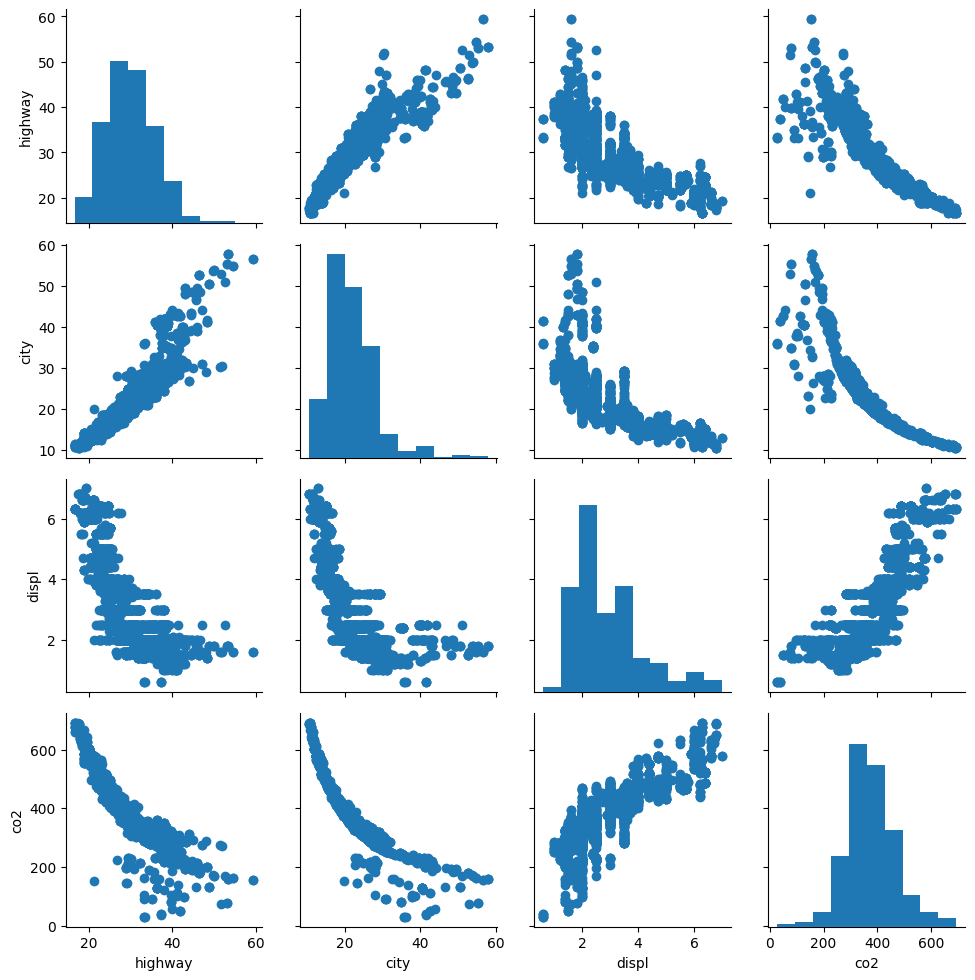

In [37]:
# Plot Matrix: fuel efficiency stats
stats = ['highway', 'city', 'displ', 'co2']
g = sns.PairGrid(data=df, vars=stats);
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

### Stats Correlation Heatmap Matrix
For numeric variables, it can be useful to create a correlation matrix as part of your exploration. While it's true that the Panda's .corr(opens in a new tab) function is perfectly fine for computing and returning a matrix of correlation coefficients, it's not too much trouble to plot the matrix as a heat map to make it easier to see the strength of the relationships.

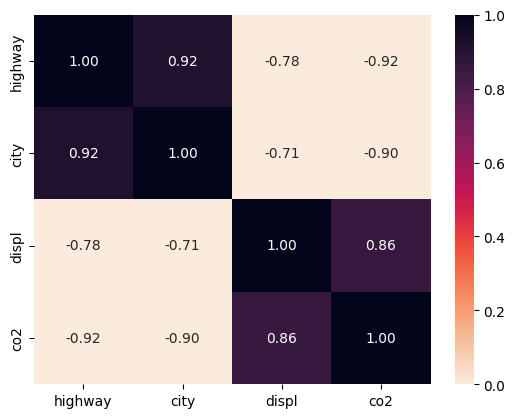

In [38]:
# Correlations Heatmap
sns.heatmap(df[stats].corr(), cmap='rocket_r', annot=True,
          fmt='.2f', vmin=0,);

## Feature Engineering

This is not so much an additional technique for adding variables to your plot, but a reminder that feature engineering is a tool that you can leverage as you explore and learn about your data. As you explore a dataset, you might find that two variables are related in some way. Feature engineering is all about creating a new variable with a sum, difference, product, or ratio between those original variables that may lend a better insight into the research questions you seek to answer.

For example, if you have one variable that gives a count of crime incidents, and a second one that gives population totals, then you may want to engineer a new variable by dividing the former by the latter, obtaining an incident rate. This would account for a possible relationship between the original features where if there are more people, there might naturally be more chances for crimes to occur. If we looked at the raw counts rather than the incident rate, we risk just seeing information about population sizes rather than what we might really want.

Another way that you can perform feature engineering is to use the cut function to divide a numeric variable into ordered bins. When we split a numeric variable into ordinal bins, it opens it up to more visual encodings. For example, we might facet plots by bins of a numeric variable, or use discrete color bins rather than a continuous color scale. This kind of discretization step might help in storytelling by clearing up noise, allowing the reader to concentrate on major trends in the data. Of course, the bins might also mislead if they're spaced improperly – check out this PolicyViz post if you'd like to see a deeper discussion in the context of map-based visualizations. https://policyviz.com/2017/11/02/choosing-map-bins/